<a href="https://colab.research.google.com/github/omarboughrara-code/EmailAppplication-/blob/main/GmaesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Importer la bibliothèque pandas.
import pandas as pd 
# Lire les données.
games = pd.read_csv("games.csv")
# Afficher les noms de colonnes du DataFrame games.
print(games.columns)

In [ ]:
print(games.shape)

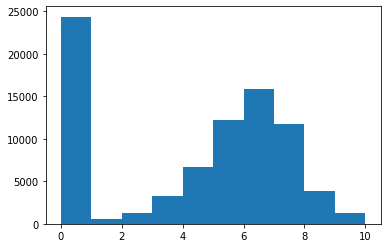

In [ ]:
# Importer matplotlib
import matplotlib.pyplot as plt
# Histogramme de toutes les notes de la colonne average_rating.
plt.hist(games["average_rating"])
# Afficher le graphique
plt.show()

In [ ]:
games[games["average_rating"] == 0]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
13048,318,boardgame,Looney Leo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0
13068,579,boardgame,Field of Fire,2002.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13114,894,boardgame,LifeLinks,2000.0,1.0,8.0,10.0,10.0,10.0,8.0,0,0.0,0.0,2,0,1,1,0,0,0.0
13116,897,boardgame,Dear Abby,1992.0,3.0,4.0,60.0,60.0,60.0,13.0,0,0.0,0.0,7,1,0,0,0,0,0.0
13124,946,boardgame,Rolazone,1999.0,2.0,2.0,30.0,30.0,30.0,0.0,0,0.0,0.0,0,0,0,3,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81309,184443,boardgame,BEARanoia,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81310,184449,boardgame,Freight,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.0,0.0,0,0,0,0,0,0,0.0


In [ ]:
# Supprime chaque ligne sans aucun review utilisateur.
games = games[games["users_rated"] > 0]
# Supprime les lignes contenant des valeurs manquantes.
games = games.dropna(axis=0)

In [ ]:
# Importer le modèle kmeans clustering.
from sklearn.cluster import KMeans
# Initialiser le modèle avec 2 paramètres -- nombre de clusters et random state.
kmeans_model = KMeans(n_clusters=5, random_state=1)
# Seulement les colonnes numériques de games.
good_columns = games._get_numeric_data()
# Adapter le modèle en utilisant les bonnes colonnes.
kmeans_model.fit(good_columns)
# Obtenir les labels des clusters.
labels = kmeans_model.labels_

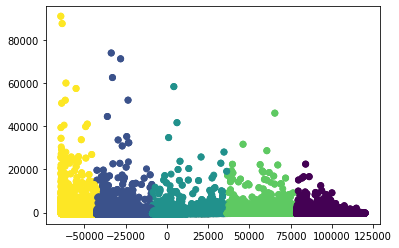

In [ ]:
# Importer le modèle PCA.
from sklearn.decomposition import PCA
# Créer un modèle PCA.
pca_2 = PCA(2)
# adapter le modèle PCA aux colonnes numériques précédentes.
plot_columns = pca_2.fit_transform(good_columns)
# Faire un graphique à nuage de points pour chaque type de jeux de société, à partir des clusters.
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
# Afficher le graphique.
plt.show()

In [ ]:
games.corr()["average_rating"]

id                      0.304201
yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

In [ ]:
# Obtenir toutes les colonnes du DataFrame games.
columns = games.columns.tolist()
# Filtrer les colonnes pour supprimer celles que nous ne voulons pas.
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name"]]
# Stocker la variable que nous voulons prédire.
target = "average_rating"

In [ ]:
# Importer une fonction prévue pour séparer les sets.
from sklearn.model_selection import train_test_split
# Générer le set de training. Fixer random_state pour répliquer lé resultats ultérieurement.
train = games.sample(frac=0.8, random_state=1)
# Sélectionner tout ce qui n'est pas dans le set de training et le mettre dans le set de test.
test = games.loc[~games.index.isin(train.index)]
# Afficher les dimensions des 2 sets.
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [ ]:
# Importer le modèle LinearRegression.
from sklearn.linear_model import LinearRegression
# Initialiser la classe du modèle.
model = LinearRegression()
# Adapter le modèle aux données d'entrainement
model.fit(train[columns], train[target])


LinearRegression()

In [ ]:
# Importer la fonction de calcul d'erreur depuis scikit-learn.
from sklearn.metrics import mean_squared_error
# Générer des prédictions pour le set de test.
predictions = model.predict(test[columns])
# Calculer l'erreur entre nos prédictions et les valeurs réelles que nous connaissons.
mean_squared_error(predictions, test[target])

1.8239281903519866

In [ ]:
# Importer le modèle random forest.
from sklearn.ensemble import RandomForestRegressor
# Initialiser le modèle avec certains paramètres.
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
# Adapter le modèle aux données.
model.fit(train[columns], train[target])
# Faire des prédictions.
predictions = model.predict(test[columns])
# Calculer l'erreur.
mean_squared_error(predictions, test[target])

1.4144661108711074